In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the cleaned data
df = pd.read_csv('cleaned_telecom_data.csv')

# Split the data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2666, 66)
Test set shape: (667, 66)


In [3]:
# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # ROC curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    
    return model

Training Logistic Regression model...
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       571
           1       0.53      0.24      0.33        96

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.63       667
weighted avg       0.83      0.86      0.84       667



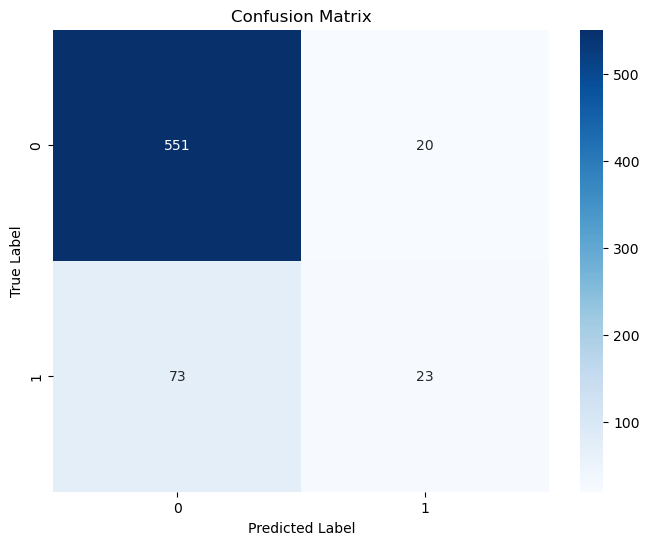

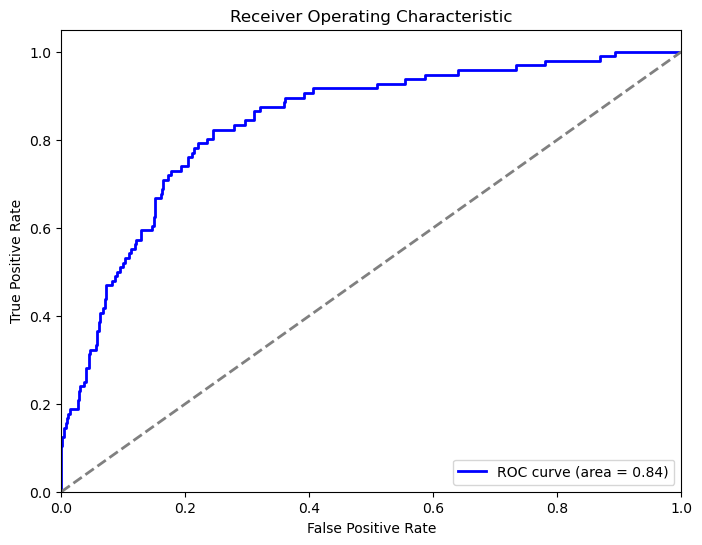

In [4]:
# Train and evaluate a Logistic Regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

Training Random Forest model...
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       571
           1       0.92      0.49      0.64        96

    accuracy                           0.92       667
   macro avg       0.92      0.74      0.80       667
weighted avg       0.92      0.92      0.91       667



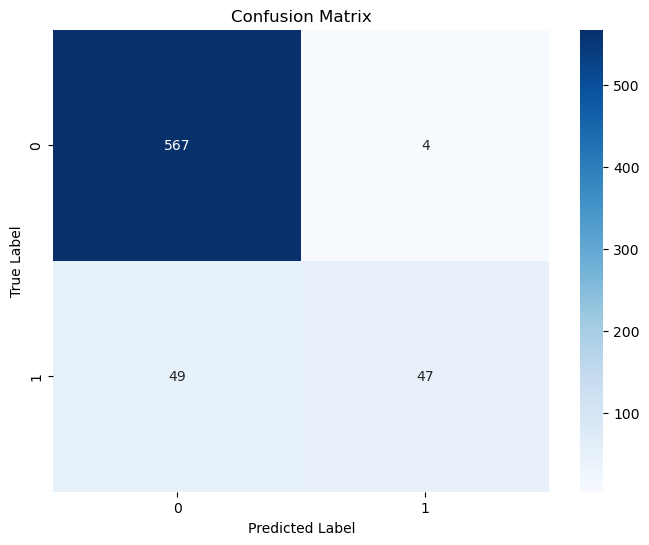

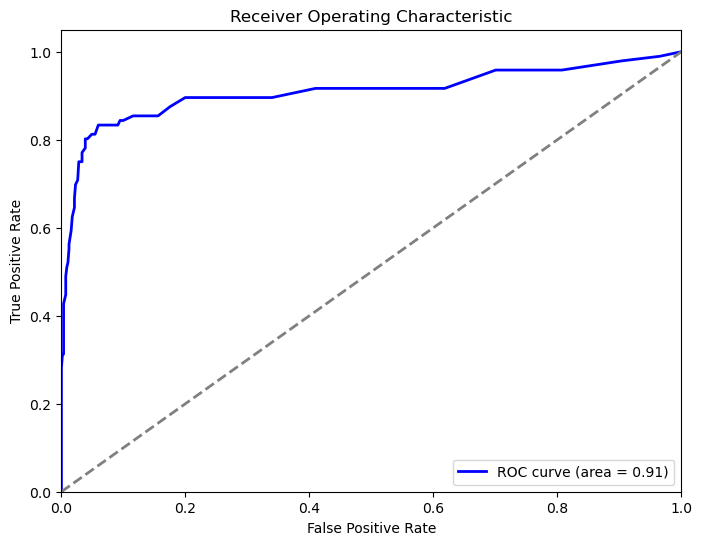

In [5]:
# Train and evaluate a Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

Training Gradient Boosting model...
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       571
           1       0.90      0.74      0.81        96

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



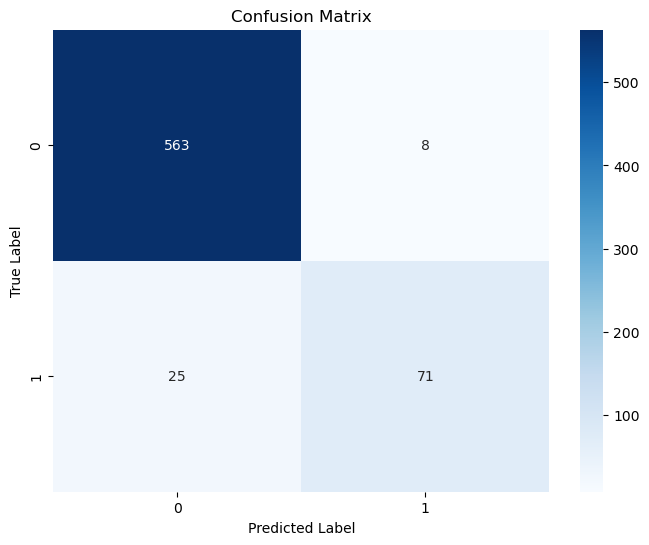

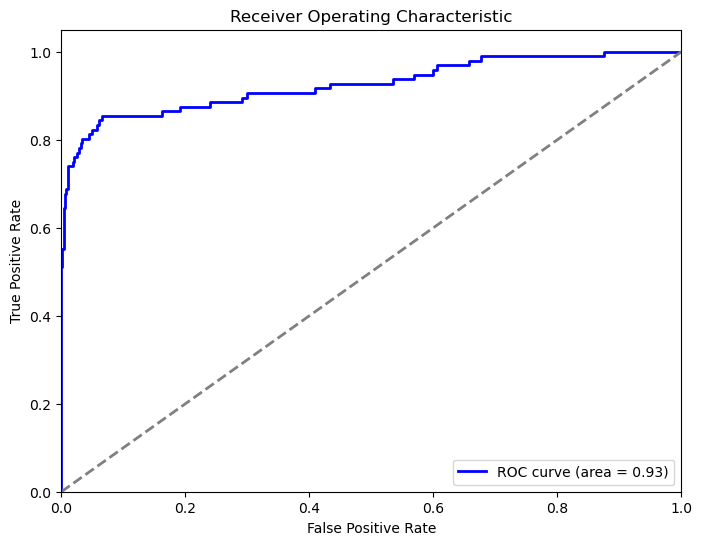

In [6]:
# Train and evaluate a Gradient Boosting model
print("Training Gradient Boosting model...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model = evaluate_model(gb_model, X_train, X_test, y_train, y_test)

Training XGBoost model...
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       571
           1       0.92      0.76      0.83        96

    accuracy                           0.96       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.96      0.96      0.95       667



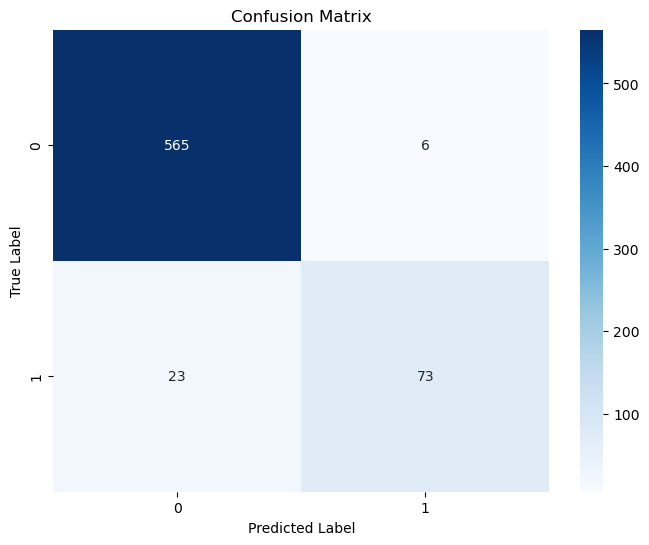

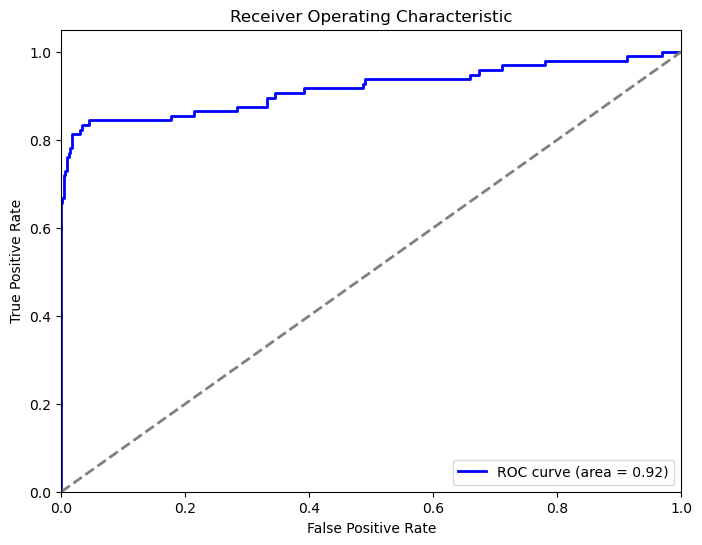

In [7]:
# Train and evaluate an XGBoost model
print("Training XGBoost model...")
xgb_model = XGBClassifier(random_state=42)
xgb_model = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

Performing hyperparameter tuning for XGBoost...
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation score: 0.8251330630654417
Evaluating the best model...
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       571
           1       0.92      0.74      0.82        96

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.90       667
weighted avg       0.95      0.95      0.95       667



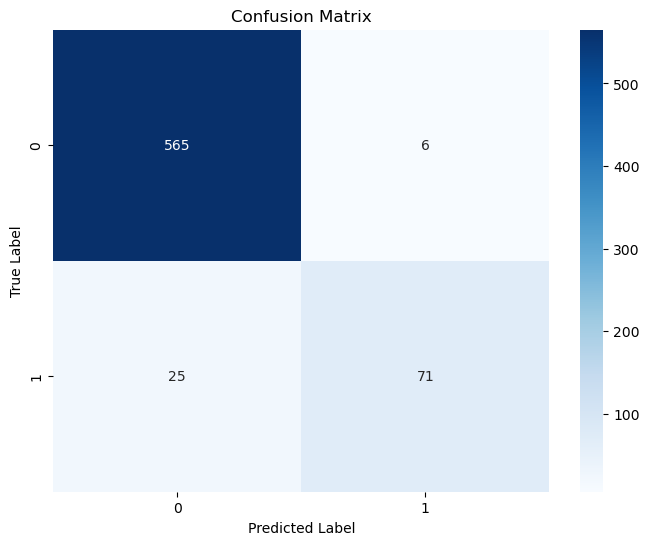

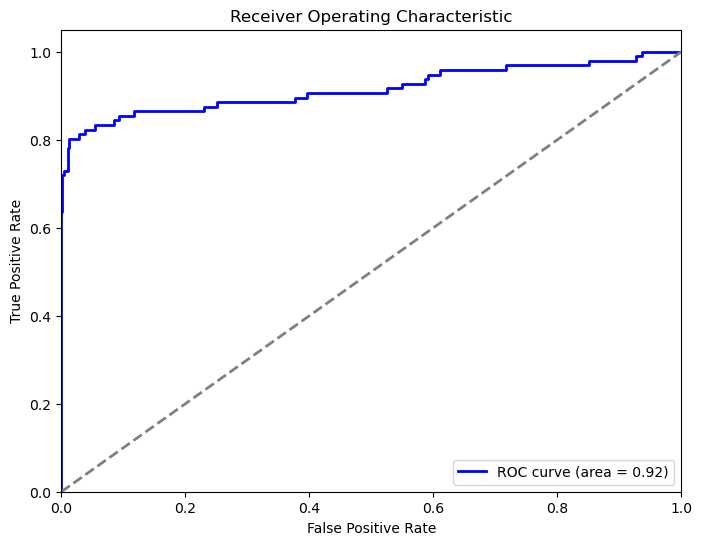

In [8]:
# Hyperparameter tuning for the best model (assuming XGBoost performed best)
print("Performing hyperparameter tuning for XGBoost...")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
print("Evaluating the best model...")
best_model = evaluate_model(best_model, X_train, X_test, y_train, y_test)

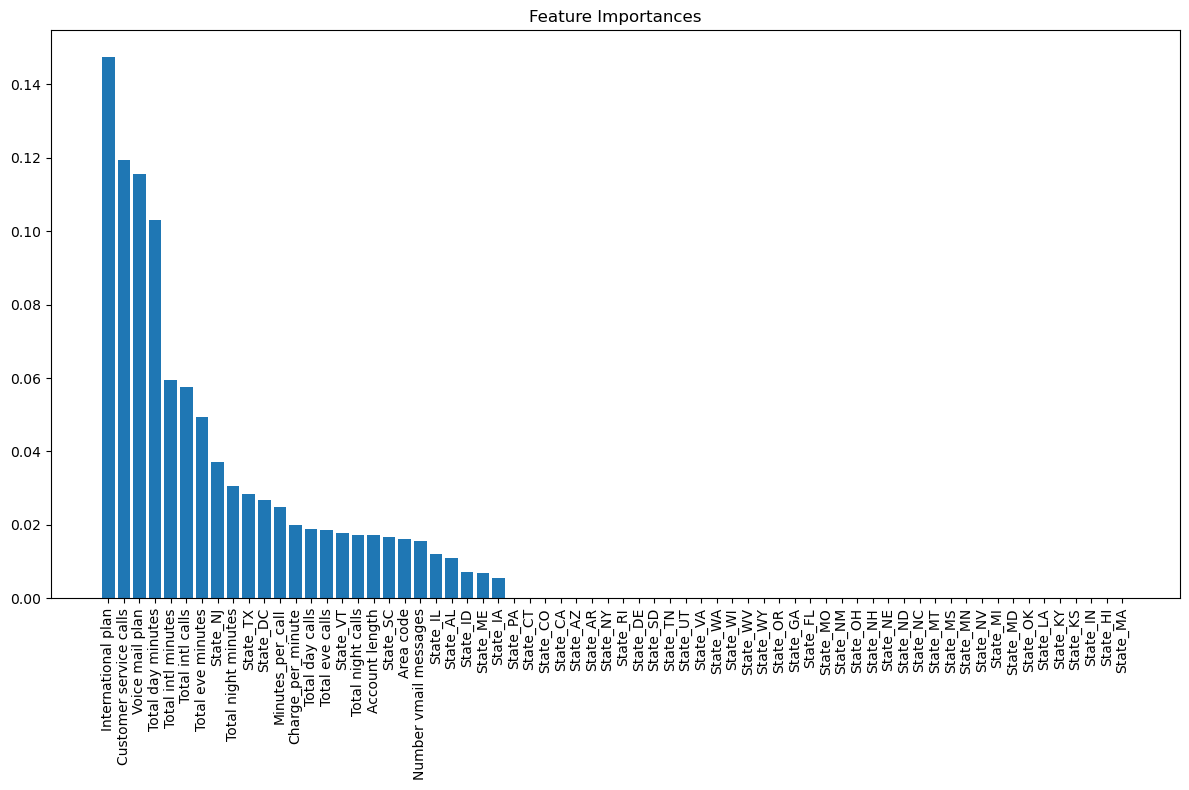

Top 10 most important features:
1. International plan: 0.1473
2. Customer service calls: 0.1194
3. Voice mail plan: 0.1155
4. Total day minutes: 0.1030
5. Total intl minutes: 0.0595
6. Total intl calls: 0.0574
7. Total eve minutes: 0.0494
8. State_NJ: 0.0370
9. Total night minutes: 0.0306
10. State_TX: 0.0284


In [9]:
# Feature importance for the best model
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Print top 10 features
    print("Top 10 most important features:")
    for i in range(10):
        print(f"{i+1}. {X_train.columns[indices[i]]}: {importances[indices[i]]:.4f}")

In [10]:
# Save the best model
import pickle

with open('best_churn_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_churn_model.pkl'")

Best model saved as 'best_churn_model.pkl'
